[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Hello-world/blob/master/Importando_dados_coolab_concentracao_regress%C3%A3o_linear.ipynb)

Importação todos os pacotes utilizados

In [0]:
#Importação todos os pacotes utilizados
import pandas as pd
from google.colab import files
import io
from scipy import stats
from scipy.interpolate import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carregar o arquivo em csv
uploaded = files.upload()

Saving calibracao.csv to calibracao.csv


In [3]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "calibracao.csv" com tamanho de 108 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['calibracao.csv'].decode('utf-8')))

In [75]:
#impressão do arquivo em data frame
calibracao_df

,concentracao,absorbancia
0,0,0.0
1,1,1.9
2,2,4.2
3,3,6.2
4,4,7.8
5,5,10.2
6,6,11.8
7,7,13.8
8,8,16.2
9,9,18.2


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [77]:
#impressão do vetor
calibracao_np

array([[ 0. ,  0. ],
       [ 1. ,  1.9],
       [ 2. ,  4.2],
       [ 3. ,  6.2],
       [ 4. ,  7.8],
       [ 5. , 10.2],
       [ 6. , 11.8],
       [ 7. , 13.8],
       [ 8. , 16.2],
       [ 9. , 18.2],
       [10. , 19.8]])

In [7]:
#vetor do eixo x
x = calibracao_np[:,0]
print(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [9]:
#vetor do eixo y
y = calibracao_np[:,1]
print(y)

[ 0.   1.9  4.2  6.2  7.8 10.2 11.8 13.8 16.2 18.2 19.8]


In [10]:
linear_p = np.polyfit(x, y, 1)
print(linear_p)

[1.99454545 0.03636364]


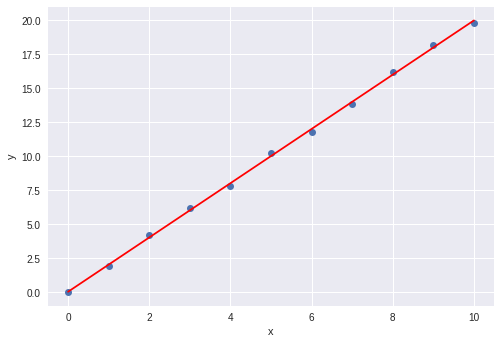

In [15]:
#impressão dos dados experimentais e do modelo linear
plt.plot(x, y, "o")
plt.plot(x, np.polyval(linear_p, x), "-r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [0]:
#tratamento estatístico do ajuste
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [17]:
#coeficiente de correlação
print(r_value)

0.9995822826203034


In [18]:
#Standard error of the estimated gradient
print(std_err)

0.01922272912382097


Outra maneira de calcular o coeficiente de correção

0.9991647397284159


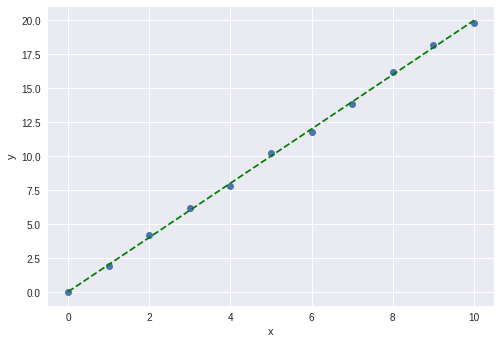

In [19]:
yfit = linear_p[0] * x + linear_p[1] # calcula os valores preditos
yresid = y - yfit # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação

print(R2) # imprime coeficiente de determinação


plt.plot(x,y,'o')
plt.plot(x,np.polyval(linear_p,x),'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.show()